In [1]:

import utils 
import numpy as np
import random

T = (12,12)
K = 12
S = (1,1)

alpha = 0.5
gamma = 0.9
eps = np.random.random_sample()
print(eps)

# Générer les dictionnaires de transitions  d'états
transitions = utils.dict_transition(K, T, False)
transitions_trap = utils.dict_transition(K, T, True)

# Générer les récompenses 
rewards = utils.dict_rewards(K, T, False)
rewards_trap = utils.dict_rewards(K, T, True)

# Générer les tuples d'éta action
states, actions, states_actions = utils.state_action(K, False)
_, _, states_actions_trap = utils.state_action(K, True)

def qlearning(states_actions, rewards, states, actions, gamma, alpha, eps, T, iteration, transitions):
    
    # Liste des états non absorbants
    state_no_absorbing = list(set([t[0] for t in states_actions if t[1]!=None]))
    
    # Initialisation de Q
    q = utils.initilize_q(states_actions, T, state_no_absorbing)

    pi = {}
    
    for state, action in states_actions:
        if(action != None and (state, action) not in pi):
            pi = utils.maximize_q(q, state, actions, alpha, transitions, rewards, pi, eps)
       
    # Pour chaque épisode
    for episode in range(iteration):
        #print(episode)
        
        nb = random.randint(0, len(state_no_absorbing)-1)
        S =  state_no_absorbing[nb] # initialiser S
        # Choisir une action a depuis s en utilisant la politique spécifiée par Q (par exemple ε-greedy)
        #a = base_tp2.choice(S, pi, states_actions) #choisir a
              
        # Etape de l'épisode
        while(S in state_no_absorbing):
            a = utils.choice(S, pi, states_actions) #choisir a
              
            S_prime = transitions[S][a] #take a and observe s prime
            r = rewards[S_prime] #observe r
            # Choisir a_prime
            """if (S_prime in state_no_absorbing):
                a_prime = base_tp2.choice(S_prime, pi, states_actions) #choisir a_prime
            else:
                a_prime = None
                q[(S, a)] = q[(S, a)] + alpha*(r + gamma*q[(S_prime, a_prime)] - q[(S, a)])
                break"""
                
            

            state = S_prime  # État spécifique pour lequel vous voulez trouver la valeur maximale

            # Créer une liste pour stocker les valeurs pour l'état spécifique
            values_for_state = []

            # Parcourir le dictionnaire de valeurs Q
            for state_action, value in q.items():
                current_state, _ = state_action

                # Vérifier si l'état correspond à l'état spécifié
                if current_state == state:
                    values_for_state.append(value)

            # Trouver la valeur maximale pour l'état spécifique
            max_value_for_state = max(values_for_state) if values_for_state else None

            # Afficher la valeur maximale pour l'état spécifique
            #print(f"État : {state} - Valeur maximale : {max_value_for_state}")
            qmax=max_value_for_state

           
            q[(S, a)] = q[(S, a)] + alpha*(r + gamma*qmax- q[(S, a)])            #q[(S, a)] = q[(S, a)] + alpha * (r + gamma * (np.max([q[(S_prime, action)] for action in states_actions])) - q[(S, a)])

            pi = utils.maximize_q(q, S, actions, alpha, transitions, rewards, pi, eps)

            S = S_prime
            #a = a_prime
            
        eps = 1 / (episode + 2)
        
    return q, pi
      
eps = np.random.random_sample()

"""
Faire idem pour les autres questions
"""

# no trap
q_qlearning, pi_qlearning = qlearning(states_actions, rewards, states, actions, gamma, alpha, eps, T, 10000, transitions)

pi_final_qlearning = utils.construct_path(pi_qlearning, states_actions, transitions, S, T)

paths_qlearning, reward_qlearning = utils.optimal_policy(pi_final_qlearning, rewards, S, T, states_actions)

#base_tp2.gridword(pi_final_qlearning, K, "qlearning/Chemin (sans piège) avec l'algo qlearning pour alpha = " + str(alpha) + " et gamma = " + str(gamma), states_actions)

# trap
alpha = 0.1 # Entre 0 et 1
gamma = 0.9
q_qlearning_trap, pi_qlearning_trap = qlearning(states_actions_trap, rewards_trap, states, actions, gamma, alpha, eps, T, 10000, transitions_trap)

pi_final_qlearning_trap = utils.construct_path(pi_qlearning_trap, states_actions_trap, transitions_trap, S, T)
paths_qlearning_trap, reward_qlearning_trap = utils.optimal_policy(pi_final_qlearning_trap, rewards_trap, S, T, states_actions_trap)

#base_tp2.gridword(pi_final_qlearning_trap, K, "qlearning/Chemin (avec piège) avec l'algo qlearning pour alpha = " + str(alpha) + " et gamma = " + str(gamma),  states_actions_trap)

# Tester plusieurs paramètres
"""def params_qlearning(alphas, gammas, S, T, transitions, rewards, states_actions):
    rewards_total = {}
    paths = {}
    pi = {}
    for alpha in alphas:
        for gamma in gammas:
            print(alpha, "  ", gamma)
            q_qlearning, pi_qlearning = qlearning(states_actions, rewards, states, actions, gamma, alpha, eps, T, 10000, transitions)
            pi_final_qlearning = base_tp2.construct_path(pi_qlearning, states_actions, transitions, S, T)
            paths[(alpha, gamma)], rewards_total[(alpha, gamma)] = base_tp2.optimal_policy(pi_final_qlearning, rewards, S, T, states_actions)
            print(paths[(alpha, gamma)])
            pi[(alpha, gamma)] = pi_final_qlearning
    return paths, rewards_total, pi_final_qlearning

alphas = [0.1]
gammas = [0.9]
paths_qlearning, rewards_qlearning, pi_final_qlearning = params_qlearning(alphas, gammas, S, T, transitions, rewards, states_actions)

paths_qlearning_trap, rewards_qlearning_trap, pi_final_qlearning_trap = params_qlearning(alphas, gammas, S, T, transitions_trap, rewards_trap, states_actions_trap)

"""

0.45375170722577474


'def params_qlearning(alphas, gammas, S, T, transitions, rewards, states_actions):\n    rewards_total = {}\n    paths = {}\n    pi = {}\n    for alpha in alphas:\n        for gamma in gammas:\n            print(alpha, "  ", gamma)\n            q_qlearning, pi_qlearning = qlearning(states_actions, rewards, states, actions, gamma, alpha, eps, T, 10000, transitions)\n            pi_final_qlearning = base_tp2.construct_path(pi_qlearning, states_actions, transitions, S, T)\n            paths[(alpha, gamma)], rewards_total[(alpha, gamma)] = base_tp2.optimal_policy(pi_final_qlearning, rewards, S, T, states_actions)\n            print(paths[(alpha, gamma)])\n            pi[(alpha, gamma)] = pi_final_qlearning\n    return paths, rewards_total, pi_final_qlearning\n\nalphas = [0.1]\ngammas = [0.9]\npaths_qlearning, rewards_qlearning, pi_final_qlearning = params_qlearning(alphas, gammas, S, T, transitions, rewards, states_actions)\n\npaths_qlearning_trap, rewards_qlearning_trap, pi_final_qlearning

In [2]:
def path(pi):
    v=np.zeros((12,12),dtype='int')
    i,j=1,1
    v[i-1,j-1]=1
    while (i,j)!=(12,12):
        if pi[(i,j)][0]=='up':
            j+=1
        
        elif pi[(i,j)][0]=='down':
            j-=1
        elif pi[(i,j)][0]=='right':
            i+=1
        else:
            i-=1
        v[i-1,j-1]=1
    return v

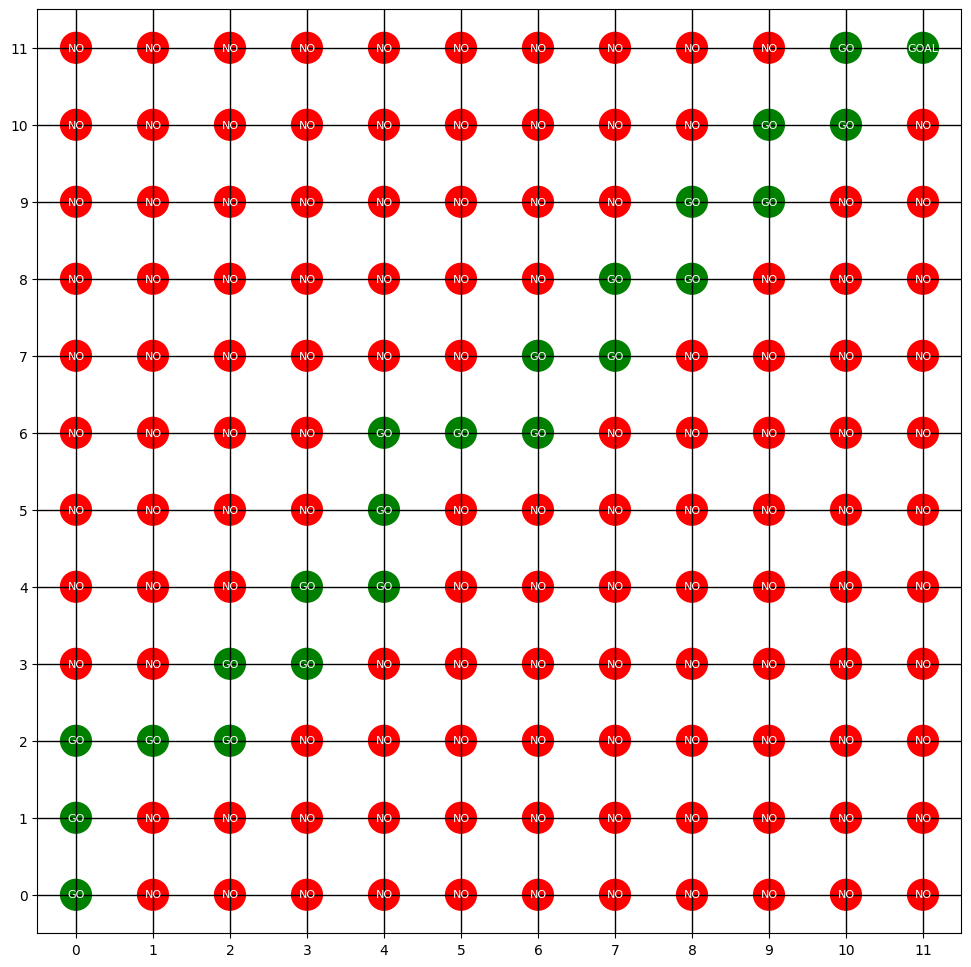

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_path(matrix):
    matrix_size = np.shape(matrix)
    fig, ax = plt.subplots(figsize=matrix_size)

    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if matrix[i, j] == 0:
                circle = plt.Circle((j, i), 0.2, color='red')
                ax.add_artist(circle)
                ax.text(j, i, 'NO', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] != 0 and (i==11 and j==11):
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GOAL', ha='center', va='center', color='white', fontsize=8)
            else:
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GO', ha='center', va='center', color='white', fontsize=8)

    ax.set_xlim(-0.5, matrix_size[1] - 0.5)
    ax.set_ylim(-0.5, matrix_size[0] - 0.5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(matrix_size[1]))
    ax.set_yticks(np.arange(matrix_size[0]))
    ax.set_xticklabels(np.arange(matrix_size[0]))
    ax.set_yticklabels(np.arange(matrix_size[0]))
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.show()



plot_path(path(pi_final_qlearning))


#Q-learning with traps

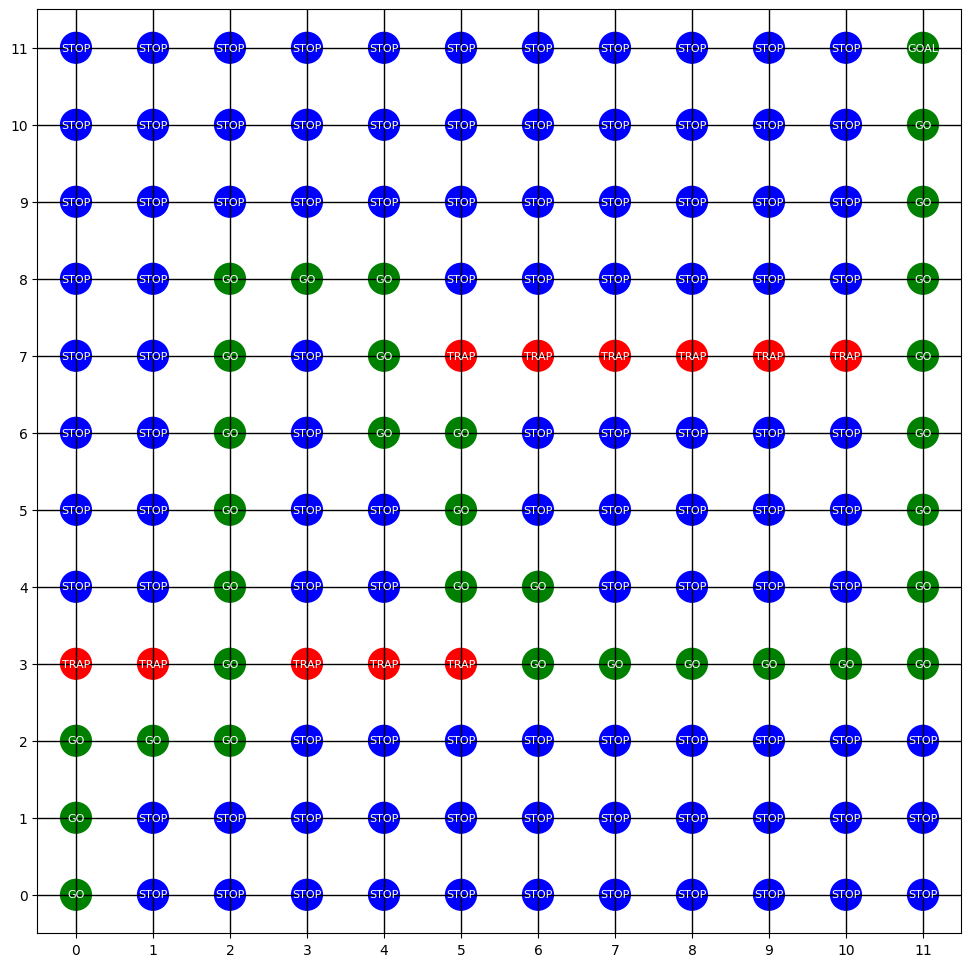

In [4]:

import numpy as np
import matplotlib.pyplot as plt
traps = [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7),
                      (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7,10), (7, 11)]
def plot_path(matrix, traps):
    matrix_size = np.shape(matrix)
    fig, ax = plt.subplots(figsize=matrix_size)

    for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if matrix[i, j] == 0 and (i,j) in traps:
                circle = plt.Circle((j, i), 0.2, color='red')
                ax.add_artist(circle)
                ax.text(j, i, 'TRAP', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] == 0:
                circle = plt.Circle((j, i), 0.2, color='blue')
                ax.add_artist(circle)
                ax.text(j, i, 'STOP', ha='center', va='center', color='white', fontsize=8)
            elif matrix[i, j] != 0 and (i==11 and j==11):
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GOAL', ha='center', va='center', color='white', fontsize=8)
            else:
                circle = plt.Circle((j, i), 0.2, color='green')
                ax.add_artist(circle)
                ax.text(j, i, 'GO', ha='center', va='center', color='white', fontsize=8)

    ax.set_xlim(-0.5, matrix_size[1] - 0.5)
    ax.set_ylim(-0.5, matrix_size[0] - 0.5)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(matrix_size[1]))
    ax.set_yticks(np.arange(matrix_size[0]))
    ax.set_xticklabels(np.arange(matrix_size[0]))
    ax.set_yticklabels(np.arange(matrix_size[0]))
    ax.grid(which='both', color='black', linestyle='-', linewidth=1)
    plt.show()



plot_path(path(pi_final_qlearning_trap),traps)


In [5]:
q_values = pi_qlearning_trap

state = (1, 2)  # État spécifique pour lequel vous voulez trouver la valeur maximale

# Créer une liste pour stocker les valeurs pour l'état spécifique
values_for_state = []

# Parcourir le dictionnaire de valeurs Q
for state_action, value in q_values.items():
    current_state, _ = state_action

    # Vérifier si l'état correspond à l'état spécifié
    if current_state == state:
        values_for_state.append(value)

# Trouver la valeur maximale pour l'état spécifique
max_value_for_state = max(values_for_state) if values_for_state else None

# Afficher la valeur maximale pour l'état spécifique
print(f"État : {state} - Valeur maximale : {max_value_for_state}")


État : (1, 2) - Valeur maximale : 0.9999330723153632


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour dessiner des cercles verts
def draw_circle(ax, position):
    circle = plt.Circle(position, 0.15, color='green')
    ax.add_patch(circle)

# Déssiner graphique du chemin
def gridword(pi, K, title, states_actions):

    # Liste des états non absorbants
    state_no_absorbing = list(set([t[0] for t in states_actions if t[1] != None]))

    # Récupérer seulement les états et pas les actions
    pi_states = {}
    for key in pi.keys():
        pi_states[key] = pi[key][1]

    # Création de la figure
    fig, ax = plt.subplots()

    # Dessiner les cercles sur la grille
    S = (1, 1)
    while S in state_no_absorbing:
        position = S
        draw_circle(ax, position)
        S = pi_states[S]

    # Réglages de l'axe
    ax.set_xticks(np.arange(0, K+1, 1))
    ax.set_yticks(np.arange(0, K+1, 1))
    ax.grid()

    # Affichage de la figure
    plt.title(title)
    plt.show()